# Homework 1: Applied Machine Learning - Linear | Logisitc | SVM

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from numpy.linalg import inv
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.preprocessing import OrdinalEncoder
from sklearn.svm import LinearSVC, SVC
from sklearn.metrics import accuracy_score

In [2]:
import warnings

def fxn():
    warnings.warn("deprecated", DeprecationWarning)

with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    fxn()

In [3]:
pd.options.mode.chained_assignment = None

#**Part 1: Linear Regression**

In part 1, we will use **two datasets** to train and evaluate our linear regression model.

The first dataset will be a synthetic dataset sampled from the following equations:
   
**𝜖 ∼ Normal(0,3**)

**z = 3𝑥 + 10y + 10 + 𝜖**

In [4]:
np.random.seed(0)
epsilon = np.random.normal(0, 3, 100)
x = np.linspace(0, 10, 100) 
y = np.linspace(0, 5, 100)
z = 3 * x + 10 * y + 10 + epsilon

To apply linear regression, we need to first check if the assumptions of linear regression are not violated.

Assumptions of Linear Regression:

- Linearity: $y$ is a linear (technically affine) function of $x$.
- Independence: the $x$'s are independently drawn, and not dependent on each other.
- Homoscedasticity: the $\epsilon$'s, and thus the $y$'s, have constant variance.
- Normality: the $\epsilon$'s are drawn from a Normal distribution (i.e. Normally-distributed errors)

These properties, as well as the simplicity of this dataset, will make it a good test case to check if our linear regression model is working properly.

**1.1. Plot z vs x and z vs y in the synthetic dataset as scatter plots. Label your axes and make sure your y-axis starts from 0. Do the independent and dependent features have linear relationship?**

Answer: Yes the independent and dependent features have linear relationship.

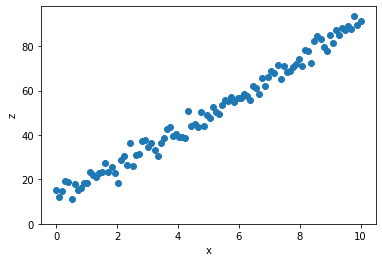

In [5]:
### Your code here
plt.scatter(x, z)
plt.xlabel("x")
plt.ylabel("z")
plt.ylim(ymin=0)
plt.show()

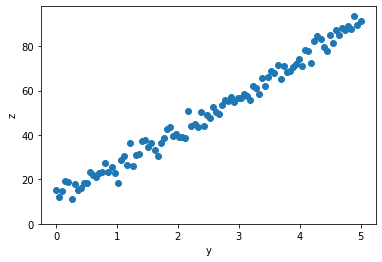

In [6]:
### Your code here
plt.scatter(y, z)
plt.xlabel("y")
plt.ylabel("z")
plt.ylim(ymin=0)
plt.show()

**1.2. Are the independent variables correlated? Use pearson correlation to verify? What would be the problem if linear regression is applied to correlated features?**

Answer: Yes, from below, we see that the pearson correlation coefficient for x and y is nearly 1. This means that the independent variables have a very strong linear relationship. The problem of applying linear regression to correlated features is that multi-collinearity can produce solutions that are wildly varying and unstable. Also, it is difficult to correctly assess how much impact each independent variable has on the dependent variable.

In [7]:
### Your code here
from scipy.stats import pearsonr
p, _ = pearsonr(x,y)
print(p)

0.9999999999999999


**The second dataset we will be using is an auto MPG dataset. This dataset contains various characteristics for around 8128 cars. We will use linear regression to predict the selling_price label**

In [8]:
auto_mpg_df = pd.read_csv('Car details v3.csv')
# Dropping Torque column, there is information in this column but it will take some preprocessing.
# The idea of the exercise is to familarize yourself with the basics of Linear regression.
auto_mpg_df = auto_mpg_df.drop(['torque'], axis = 1)

In [9]:
auto_mpg_df

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...
8123,Hyundai i20 Magna,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.5 kmpl,1197 CC,82.85 bhp,5.0
8124,Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.8 kmpl,1493 CC,110 bhp,5.0
8125,Maruti Swift Dzire ZDi,2009,382000,120000,Diesel,Individual,Manual,First Owner,19.3 kmpl,1248 CC,73.9 bhp,5.0
8126,Tata Indigo CR4,2013,290000,25000,Diesel,Individual,Manual,First Owner,23.57 kmpl,1396 CC,70 bhp,5.0


**1.3. Missing Value analysis - Auto mpg dataset.**

**Are there any missing values in the dataset? If so, what can be done about it? Jusify your approach.**

Answer: Yes, from below, we can see that there are missing values concentrated in the mileage, engine, max_power, and seats columns. There are multiple ways to handle the missing values. For instance, we could drop these columns, use the mean or median of the existing values in the column and fill the empty ones out, or drop out the rows with missing values. Since there are only 200-ish (<3%) rows with any kind of missing values, we can just remove them.

In [10]:
### Your code here
details = pd.DataFrame(auto_mpg_df)
print(details.isnull().sum())

# drop columns with missing values   
auto_mpg_df = details.dropna()
auto_mpg_df

name               0
year               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage          221
engine           221
max_power        215
seats            221
dtype: int64


,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...
8123,Hyundai i20 Magna,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.5 kmpl,1197 CC,82.85 bhp,5.0
8124,Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.8 kmpl,1493 CC,110 bhp,5.0
8125,Maruti Swift Dzire ZDi,2009,382000,120000,Diesel,Individual,Manual,First Owner,19.3 kmpl,1248 CC,73.9 bhp,5.0
8126,Tata Indigo CR4,2013,290000,25000,Diesel,Individual,Manual,First Owner,23.57 kmpl,1396 CC,70 bhp,5.0


**1.4. The features engine, max_power and mileage have units in the dataset. In the real world if we have such datasets, we generally remove the units from each feature. After doing so, convert the datatype of these columns to float. For example: 1248 CC engine is 1248, 23.4 kmpl is 23.4 and so on.**

**Hint: Check for distinct units in each of these features. A feature might have multiple units as well. Also, a feature could have no value but have unit. For example 'CC' without any value. Remove such rows.**

In [11]:
## check for distinct units in 'mileage'
counter = dict()
for idx, row in auto_mpg_df.iterrows():
    unit = row['mileage'][-5:].strip()
    if(unit in counter):
        counter[unit] += 1
    else:
        counter[unit] = 1
print("mileage: ",counter)

## check for distinct units in 'engine'
counter = dict()
for idx, row in auto_mpg_df.iterrows():
    unit = row['engine'][-3:].strip()
    if(unit in counter):
        counter[unit] += 1
    else:
        counter[unit] = 1
print("engine: ",counter)

## check for distinct units in 'max_power'
counter = dict()
for idx, row in auto_mpg_df.iterrows():
    unit = row['max_power'][-4:].strip()
    if(unit in counter):
        counter[unit] += 1
    else:
        counter[unit] = 1
print("max_power: ",counter)

mileage:  {'kmpl': 7819, 'km/kg': 88}
engine:  {'CC': 7907}
max_power:  {'bhp': 7907}


Answer: If the number of data points with different units are less, we can just ignore it since it will not have a major impact on the result. We see that 'engine' and 'max_power' have consistent units, while in 'mileage', we have both 'kmpl' and 'km/kg'. Since 'km/kg' accounts for only 1% of the units in 'mileage', we just ignore it.

In [12]:
### Your code here 
for index in range(len(auto_mpg_df['engine'])):
    mp = auto_mpg_df['max_power'].iloc[index]
    e = auto_mpg_df['engine'].iloc[index]
    m = auto_mpg_df['mileage'].iloc[index]
    
    # if there's only unit and no value, replace with NaN
    if(len(m.split())==1):
        auto_mpg_df['mileage'].iloc[index] = np.NaN
    # value + unit: remove unit and keep the value portion
    else:
        auto_mpg_df['mileage'].iloc[index] = float(m.split()[0])

    if(len(e.split())==1):
        auto_mpg_df['engine'].iloc[index]  = np.NaN
    else:
        auto_mpg_df['engine'].iloc[index] = float(e.split()[0])

    if(len(mp.split())==1):
        auto_mpg_df['max_power'].iloc[index] = np.NaN
    else:
        auto_mpg_df['max_power'].iloc[index] = float(mp.split()[0])
        
auto_mpg_df


# see how many features have no value but have unit (only 1)
print(auto_mpg_df.isnull().sum())

# drop columns with NaN  (which originally had only unit)
auto_mpg_df = auto_mpg_df.dropna()
auto_mpg_df

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
mileage          0
engine           0
max_power        1
seats            0
dtype: int64


,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4,1248.0,74.0,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7,1497.0,78.0,5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0,1396.0,90.0,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1,1298.0,88.2,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...
8123,Hyundai i20 Magna,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.5,1197.0,82.85,5.0
8124,Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.8,1493.0,110.0,5.0
8125,Maruti Swift Dzire ZDi,2009,382000,120000,Diesel,Individual,Manual,First Owner,19.3,1248.0,73.9,5.0
8126,Tata Indigo CR4,2013,290000,25000,Diesel,Individual,Manual,First Owner,23.57,1396.0,70.0,5.0


In [13]:
auto_mpg_X = auto_mpg_df.drop(columns=['selling_price'])
auto_mpg_y = auto_mpg_df['selling_price']

**1.5. Plot the distribution of the label (selling_price) using a histogram. Make multiple plots with different binwidths. Make sure to label your axes while plotting.**

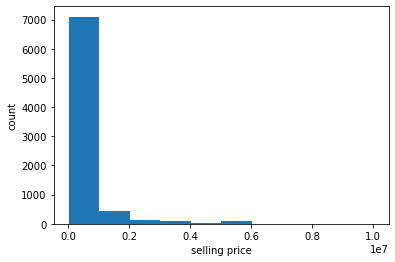

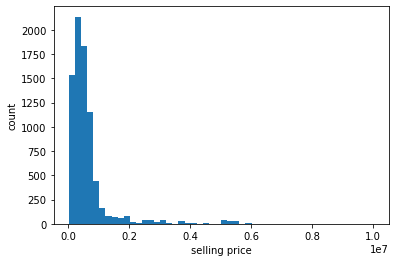

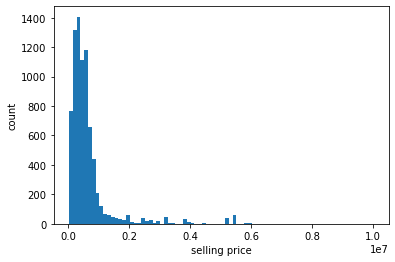

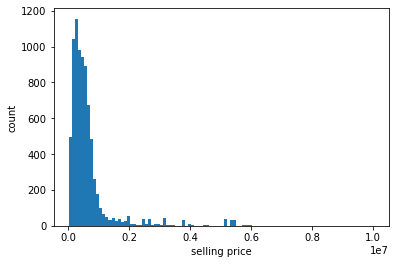

In [14]:
### Your code here
plt.xlabel("selling price")
plt.ylabel("count")
plt.hist(auto_mpg_y, bins=10)
plt.show()

### Your code here
plt.xlabel("selling price")
plt.ylabel("count")
plt.hist(auto_mpg_y, bins=50)
plt.show()

### Your code here
plt.xlabel("selling price")
plt.ylabel("count")
plt.hist(auto_mpg_y, bins=80)
plt.show()

### Your code here
plt.xlabel("selling price")
plt.ylabel("count")
plt.hist(auto_mpg_y, bins=100)
plt.show()

**1.6. Plot the relationships between the label (Selling Price) and the continuous features (Mileage, km driven, engine, max power) using a small multiple of scatter plots. 
Make sure to label the axes. Do you see something interesting about the distributions of these features.**

Answer: Overall, there aren't any variables that have a strong linear relationship to the price. For instance, mileage and selling price don't have a discernible relationship. As for km_driven, it could be said that the more distance you drive, generally the selling price decreases, although this relationship is weak. For engine, and max_power, the points are somewhat scattered across, but we could say that the better the engine and max power, generally the selling price increases.

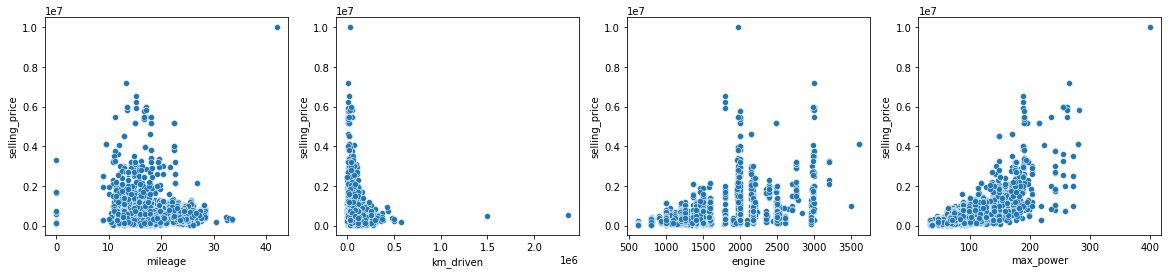

In [15]:
### Your code here
fig, ax = plt.subplots(1, 4, figsize=(20,4))
arr = list(["mileage", "km_driven", "engine", "max_power"])

for i in range(len(arr)):
    sns.scatterplot(x = auto_mpg_X[arr[i]], y=auto_mpg_y, ax=ax[i])
plt.show()

**1.7. Plot the relationships between the label (Selling Price) and the discrete features (fuel type, Seller type, transmission) using a small multiple of box plots. Make sure to label the axes.**

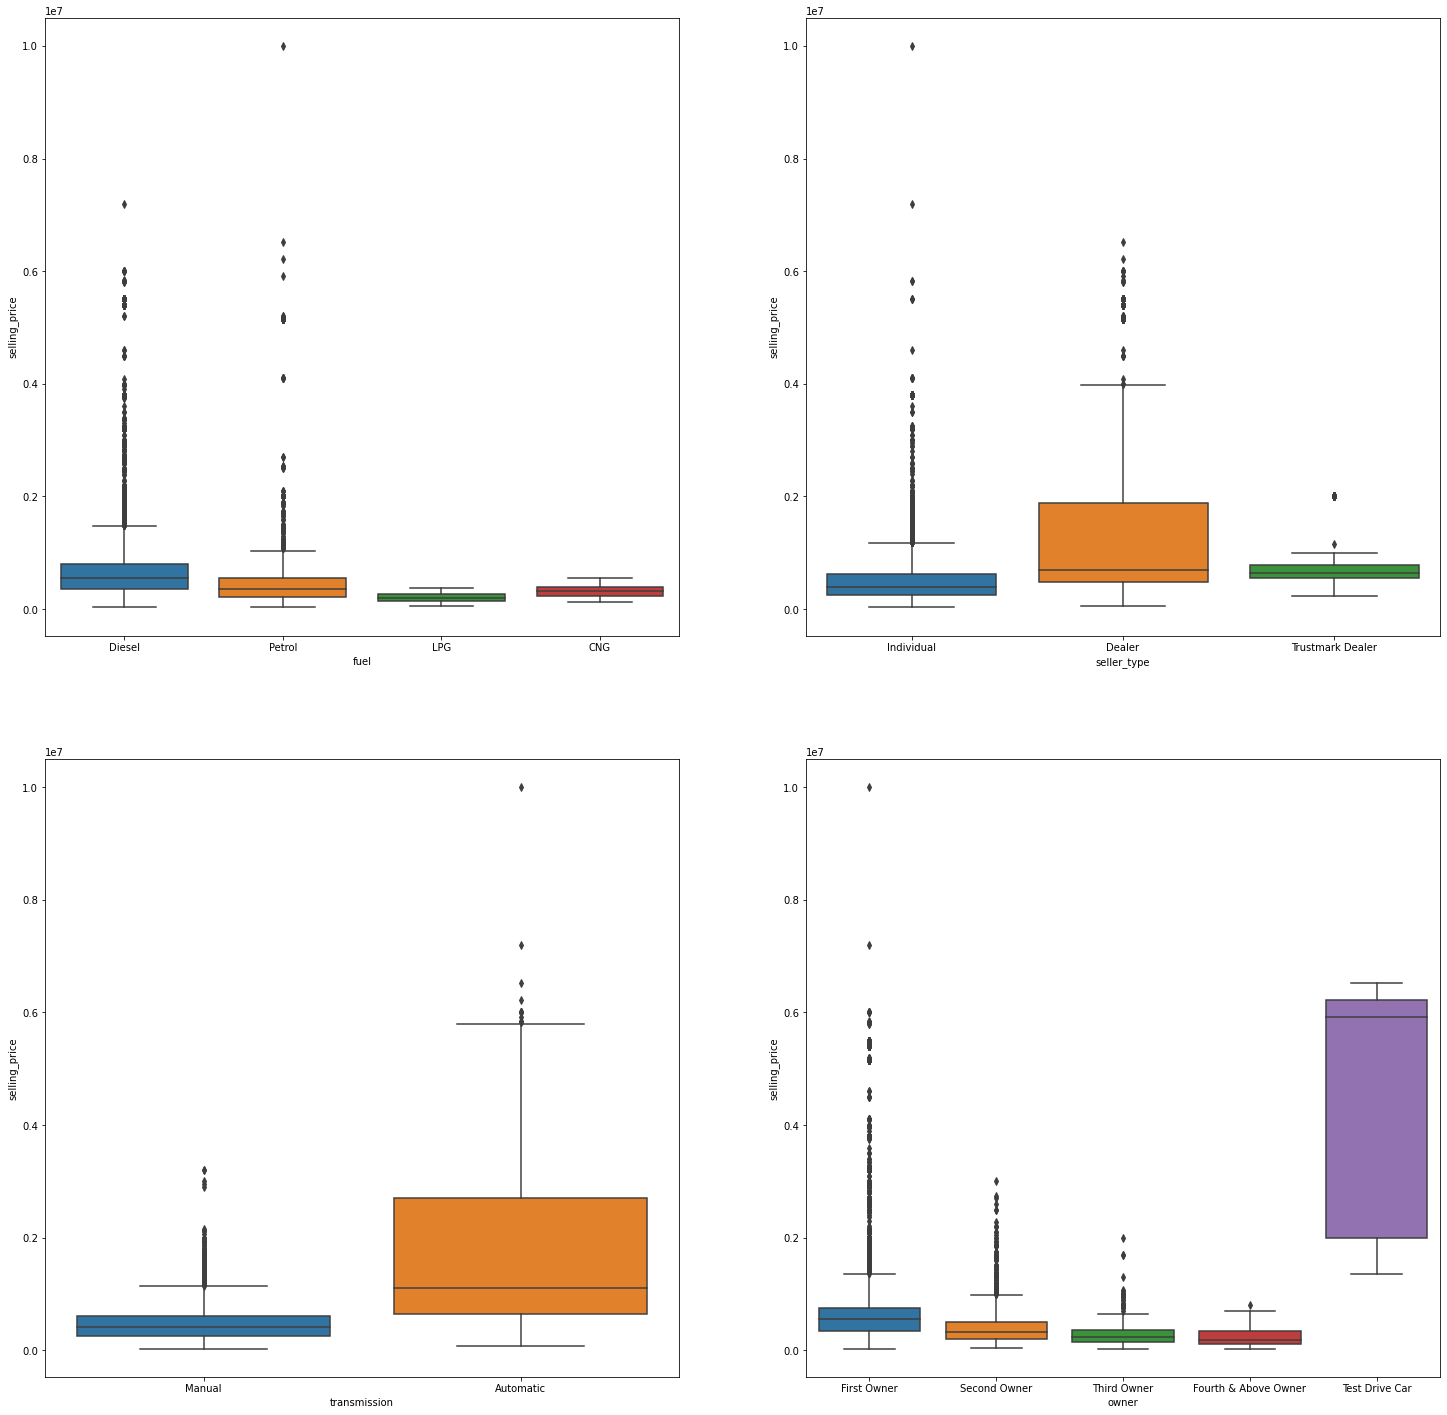

In [16]:
fig, ax = plt.subplots(2,2,figsize=(25,25))

sns.boxplot(x = auto_mpg_X["fuel"], y=auto_mpg_y, ax=ax[0][0])
sns.boxplot(x = auto_mpg_X["seller_type"], y=auto_mpg_y, ax=ax[0][1])
sns.boxplot(x = auto_mpg_X["transmission"], y=auto_mpg_y, ax=ax[1][0])
sns.boxplot(x = auto_mpg_X["owner"], y=auto_mpg_y, ax=ax[1][1])
plt.show()

**1.8. From the visualizations above, do you think linear regression is a good model for this problem? Why and/or why not?**

Answer: I think linear regression is a moderately good model for this problem, as there is a linear relationship captured between some of the independent variables (engine, max_power) and the selling_price. However, the linear relationship is not 100% clearly manifested so we cannot be 100% certain linear regression in the best model for this problem.

In [17]:
auto_mpg_X['year'] =  2020 - auto_mpg_X['year']

In [18]:
#dropping the car name as it is irrelevant.
auto_mpg_X.drop(['name'],axis = 1,inplace=True)

#check out the dataset with new changes
auto_mpg_X.head()

,year,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,6,145500,Diesel,Individual,Manual,First Owner,23.4,1248.0,74.0,5.0
1,6,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,5.0
2,14,140000,Petrol,Individual,Manual,Third Owner,17.7,1497.0,78.0,5.0
3,10,127000,Diesel,Individual,Manual,First Owner,23.0,1396.0,90.0,5.0
4,13,120000,Petrol,Individual,Manual,First Owner,16.1,1298.0,88.2,5.0


**Data Pre-processing**

**1.9.
Before we can fit a linear regression model, there are several pre-processing steps we should apply to the datasets:**
1. Encode categorial features appropriately.
2. Split the dataset into training (60%), validation (20%), and test (20%) sets.
3. Standardize the columns in the feature matrices X_train, X_val, and X_test to have zero mean and unit variance. To avoid information leakage, learn the standardization parameters (mean, variance) from X_train, and apply it to X_train, X_val, and X_test.
4. Add a column of ones to the feature matrices X_train, X_val, and X_test. This is a common trick so that we can learn a coefficient for the bias term of a linear model.


In [19]:
!pip install category_encoders

In [20]:
# 1. No categorical features in the synthetic dataset (skip this step)
# use target encoder
from category_encoders import TargetEncoder
te = TargetEncoder(cols=['fuel', 'seller_type', 'transmission', 'owner']).fit(auto_mpg_X, auto_mpg_y)
auto_mpg_X_refined = te.transform(auto_mpg_X)

# 2. Split the dataset into training (60%), validation (20%), and test (20%) sets
x_train_val, x_test, y_train_val, y_test = train_test_split(auto_mpg_X_refined, auto_mpg_y, test_size=0.2, random_state= 418)
x_train, x_val, y_train, y_val = train_test_split(x_train_val, y_train_val, test_size=0.25, random_state= 418)

# 3. Standardize the columns in the feature matrices
ss = StandardScaler()
x_train_scaled = ss.fit_transform(x_train)
x_val_scaled = ss.transform(x_val)
x_test_scaled = ss.transform(x_test)

# 4. Add a column of ones to the feature matrices
auto_mpg_X_train = np.append(x_train_scaled, np.ones([x_train_scaled.shape[0],1]), axis = 1)

auto_mpg_X_val = np.append(x_val_scaled, np.ones([x_val_scaled.shape[0],1]), axis = 1)

auto_mpg_X_test = np.append(x_test_scaled, np.ones([x_test_scaled.shape[0],1]), axis = 1)

auto_mpg_y_train = y_train
auto_mpg_y_val = y_val
auto_mpg_y_test = y_test

**At the end of this pre-processing, you should have the following vectors and matrices:**

**- Auto MPG dataset: auto_mpg_X_train, auto_mpg_X_val, auto_mpg_X_test, auto_mpg_y_train, auto_mpg_y_val, auto_mpg_y_test**

**Implement Linear Regression**

Now, we can implement our linear regression model! Specifically, we will be implementing ridge regression, which is linear regression with L2 regularization. Given an (m x n) feature matrix $X$, an (m x 1) label vector $y$, and an (n x 1) weight vector $w$, the hypothesis function for linear regression is:

$$
y = X w
$$

Note that we can omit the bias term here because we have included a column of ones in our $X$ matrix, so the bias term is learned implicitly as a part of $w$. This will make our implementation easier.

Our objective in linear regression is to learn the weights $w$ which best fit the data. This notion can be formalized as finding the optimal $w$ which minimizes the following loss function:

$$
\min_{w} \| X w - y \|^2_2 + \alpha \| w \|^2_2 \\
$$

This is the ridge regression loss function. The $\| X w - y \|^2_2$ term penalizes predictions $Xw$ which are not close to the label $y$. And the $\alpha \| w \|^2_2$ penalizes large weight values, to favor a simpler, more generalizable model. The $\alpha$ hyperparameter, known as the regularization parameter, is used to tune the complexity of the model - a higher $\alpha$ results in smaller weights and lower complexity, and vice versa. Setting $\alpha = 0$ gives us vanilla linear regression.

Conveniently, ridge regression has a closed-form solution which gives us the optimal $w$ without having to do iterative methods such as gradient descent. The closed-form solution, known as the Normal Equations, is given by:

$$
w = (X^T X + \alpha I)^{-1} X^T y
$$

**1.10. Implement a `LinearRegression` class with two methods: `train` and `predict`. You may NOT use sklearn for this implementation. You may, however, use `np.linalg.solve` to find the closed-form solution. It is highly recommended that you vectorize your code.**

In [21]:
class LinearRegression():
    '''
    Linear regression model with L2-regularization (i.e. ridge regression).

    Attributes
    ----------
    alpha: regularization parameter
    w: (n x 1) weight vector
    '''
    
    def __init__(self, alpha=0):
        self.alpha = alpha
        self.w = None

    def train(self, X, y):
        '''Trains model using ridge regression closed-form solution 
        (sets w to its optimal value).
        
        Parameters
        ----------
        X : (m x n) feature matrix
        y: (m x 1) label vector
        
        Returns
        -------
        None
        '''
        ### Your code here
        n = X.shape[1]
        self.w =(inv(X.T.dot(X)+ self.alpha* np.identity(n)).dot(X.T)).dot(y)
        
    def predict(self, X):
        '''Predicts on X using trained model.
        
        Parameters
        ----------
        X : (m x n) feature matrix
        
        Returns
        -------
        y_pred: (m x 1) prediction vector
        '''
        ### Your code here
        y_pred = X.dot(self.w)
        return y_pred

**Train, Evaluate, and Interpret Linear Regression Model**

**1.11. A) Train a linear regression model ($\alpha = 0$) on the auto MPG training data. Make predictions and report the mean-squared error (MSE) on the training, validation, and test sets. Report the first 5 predictions on the test set, along with the actual labels.**

In [22]:
### Your code here
lr = LinearRegression(0)

# train
lr.train(auto_mpg_X_train, auto_mpg_y_train)
train_pred = lr.predict(auto_mpg_X_train)
print("Train Error: ", np.square(train_pred - auto_mpg_y_train).mean())

# val
val_pred = lr.predict(auto_mpg_X_val)
print("Val Error: ", np.square(val_pred - auto_mpg_y_val).mean())

# test
test_pred = lr.predict(auto_mpg_X_test)
print("Test Error: ", np.square(test_pred - auto_mpg_y_test).mean())
print()
# Report the first 5 predictions on the test set, along with the actual labels.
for i in range(5):
    print("Predicted ", i , "-th label: ", test_pred[i])
    print("Actual ", i , "-th label: ", auto_mpg_y_test.iloc[i])

Train Error:  213983208764.53268
Val Error:  188453169023.92508
Test Error:  232381731245.2035

Predicted  0 -th label:  463781.3192251916
Actual  0 -th label:  399000
Predicted  1 -th label:  554101.7592258778
Actual  1 -th label:  550000
Predicted  2 -th label:  319616.7259982777
Actual  2 -th label:  300000
Predicted  3 -th label:  343553.5986713737
Actual  3 -th label:  400000
Predicted  4 -th label:  1016440.2600878887
Actual  4 -th label:  411000


**B) As a baseline model, use the mean of the training labels (auto_mpg_y_train) as the prediction for all instances. Report the mean-squared error (MSE) on the training, validation, and test sets using this baseline. This is a common baseline used in regression problems and tells you if your model is any good. Your linear regression MSEs should be much lower than these baseline MSEs.**

In [23]:
### Your code here
pred = np.mean(auto_mpg_y_train)

# train
train_len = len(auto_mpg_y_train)
pred_list = np.full((train_len, 1), pred)
print("Train Error: ", np.square(pred_list - auto_mpg_y_train.values.flatten()).mean())

# val
val_len = len(auto_mpg_y_val)
pred_list = np.full((val_len, 1), pred)
print("Val Error: ", np.square(pred_list - auto_mpg_y_val.values.flatten()).mean())

# test
test_len = len(auto_mpg_y_test)
pred_list = np.full((test_len, 1), pred)
print("Test Error: ", np.square(pred_list - auto_mpg_y_test.values.flatten()).mean())

Train Error:  667380419885.6895
Val Error:  581718263856.2893
Test Error:  725276578915.6936


**1.12. Interpret your model trained on the auto MPG dataset using a bar chart of the model weights. Make sure to label the bars (x-axis) and don't forget the bias term! Use lecture 3, slide 15 as a reference. According to your model, which features are the greatest contributors to the selling price**

Answer: The greatest contributing feature is "max_power" since it has the biggest positive weight. The plotting also shows that 'year' has a big negative influence on the selling price.

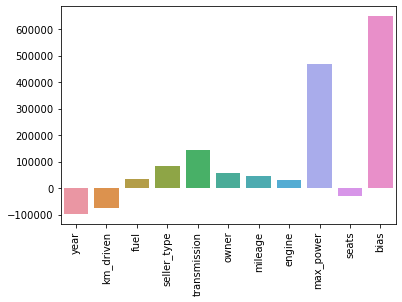

In [24]:
### Your code here
feature_names = list(auto_mpg_X_refined.columns.values)
feature_names.append('bias')
ax = sns.barplot(x=feature_names, y= lr.w)
ax.tick_params(axis='x', rotation=90)

from matplotlib import rcParams
rcParams['figure.figsize'] = 8, 6

**Tune Regularization Parameter $\alpha$**

**Now, let's do ridge regression and tune the $\alpha$ regularization parameter on the auto MPG dataset.**

**1.13. Sweep out values for $\alpha$ using `alphas = np.logspace(-2, 1, 10)`. Perform a grid search over these $\alpha$ values, recording the training and validation MSEs for each $\alpha$. A simple grid search is fine, no need for k-fold cross validation. Plot the training and validation MSEs as a function of $\alpha$ on a single figure. Make sure to label the axes and the training and validation MSE curves. Use a log scale for the x-axis.**

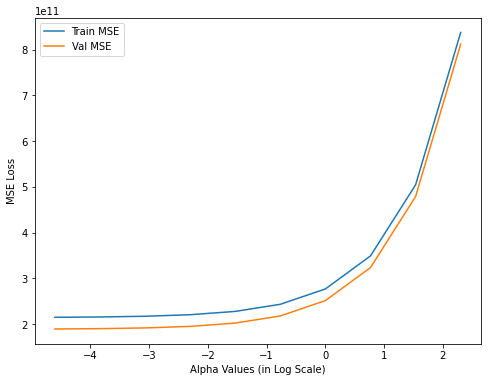

In [25]:
### Your code here
alpha_list= []
train_mse = [] 
val_mse = [] 
alphas = np.logspace(-2, 1, 10)

for alpha in alphas:    
    alpha_list.append(alpha)
    lr = LinearRegression(alpha)

    # train
    lr.train(auto_mpg_X_train, auto_mpg_y_train)
    train_pred = lr.predict(auto_mpg_X_train)
    train_mse_value = np.square(train_pred - auto_mpg_y_train).mean() + alpha * np.square(lr.w).mean()
    train_mse.append(train_mse_value)

    # val
    val_pred = lr.predict(auto_mpg_X_val)
    val_mse_value = np.square(val_pred - auto_mpg_y_val).mean() + alpha * np.square(lr.w).mean()
    val_mse.append(val_mse_value)
## Plot the training and validation MSEs as a function of  𝛼  on a single figure. 
## Make sure to label the axes and the training and validation MSE curves. Use a log scale for the x-axis.
plt.plot(np.log(alpha_list), train_mse, label = "Train MSE")
plt.plot(np.log(alpha_list), val_mse, label = "Val MSE")
plt.xlabel("Alpha Values (in Log Scale)")
plt.ylabel("MSE Loss")
plt.legend()
plt.show()

**Explain your plot above. How do training and validation MSE behave with decreasing model complexity (increasing $\alpha$)?**

Answer: As we increase alpha, both the Train MSE and the Validation MSE increases. This means if the regularization term is too big, the regularization penalty dominates the MSE loss which increases the MSE loss.

**1.14. Using the $\alpha$ which gave the best validation MSE above, train a model on the training set. Report the value of $\alpha$ and its training, validation, and test MSE. This is the final tuned model which you would deploy in production.**

In [26]:
### Your code here
print("Alpha = 0.01")
lr_model = LinearRegression(0.01)

# train
lr_model.train(auto_mpg_X_train, auto_mpg_y_train)
train_pred = lr_model.predict(auto_mpg_X_train)
train_mse_value = np.square(train_pred - auto_mpg_y_train).mean() + alpha * np.square(lr_model.w).mean()
print("Train Error: ", train_mse_value)

# val
val_pred = lr_model.predict(auto_mpg_X_val)
val_mse_value = np.square(val_pred - auto_mpg_y_val).mean() + alpha * np.square(lr_model.w).mean()
print("Val Error: ", val_mse_value)

# test
test_pred = lr_model.predict(auto_mpg_X_test)
test_mse_value = np.square(test_pred - auto_mpg_y_test).mean() + alpha * np.square(lr_model.w).mean()
print("Test Error: ", test_mse_value)

Alpha = 0.01
Train Error:  841017638598.1422
Val Error:  815487524097.5471
Test Error:  859416158607.6377


# **Part 2: Logistic Regression**

**Gender Recognition by Voice and Speech Analysis**

**This dataset is used to identify a voice as male or female, based upon acoustic properties of the voice and speech.**

In [27]:
voice_df = pd.read_csv("voice-classification.csv")
voice_df.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male


**Data - Checking Rows & Columns**

In [28]:
#Number of Rows & Columns
print(voice_df.shape) 

(3168, 21)


**2.1 What is the probability of observing different  categories in the Label feature of the dataset?**

This is mainly to check class imbalance in the dataset, and to apply different techniques to balance the dataset, which we will learn later.

Answer: The probability of observing different categories in the Label feature of the dataset is 50%, and this dataset is balanced.

In [29]:
#code here
voice_df['label'].value_counts()/len(voice_df['label'])

male      0.5
female    0.5
Name: label, dtype: float64

**2.2 Plot the relationships between the label and the 20 numerical features using a small multiple of box plots. Make sure to label the axes. What useful information do this plot provide?**

Answer: By looking at the plots, we can indentify features that may be helpful in classifying male and female. For instance, modindx feature doesn't show much difference between male and female so it isn't a very useful feature. Also, there seem to be collinearity between some features because the box plots look very similar. For instance, meanfreq and median looks almost the same. We will have to drop one of these features if needed.

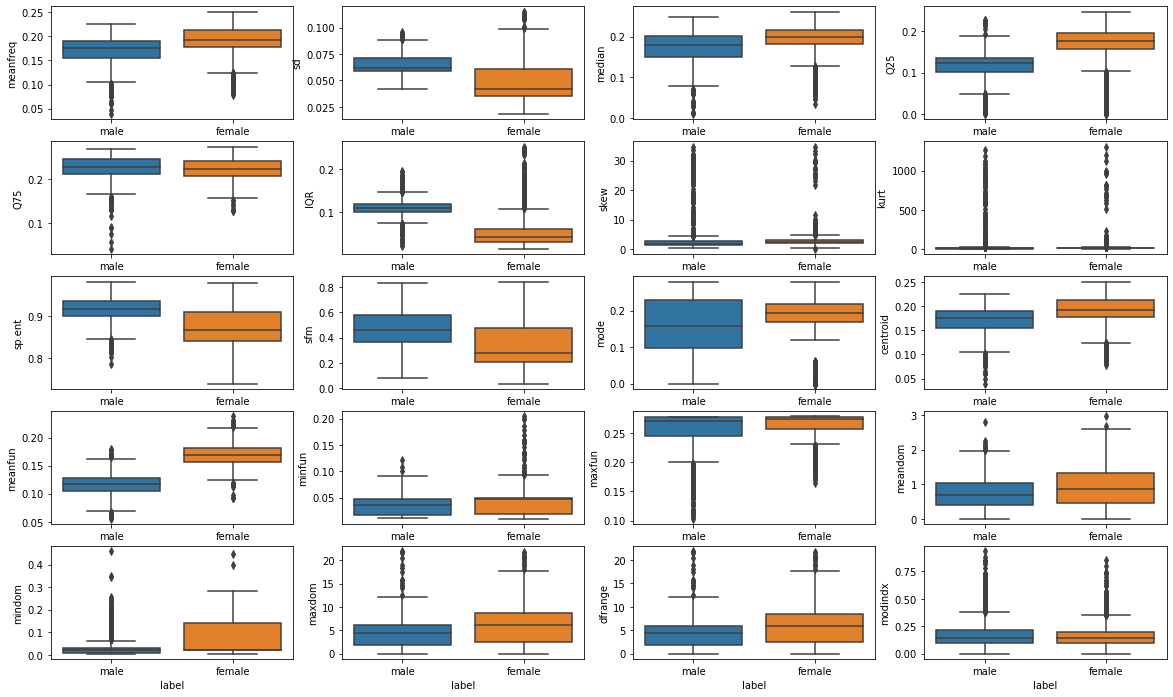

In [30]:
#code here
fig, ax = plt.subplots(5,4, figsize = (20,12))
for i in range(20):
    col = voice_df.columns[i]
    a = ax.flatten()[i]
    sns.boxplot(x = voice_df['label'], y = voice_df[col], ax=a)

**2.3 Plot the correlation matrix, and check if there is high correlation between the given numerical features (Threshold >=0.9). If yes, drop those highly correlated features from the dataframe. Why is necessary to drop those columns before proceeding further?**

Answer: It's necessary to drop one of those highly correlated columns because we want our independent variables to be independent from one another and for our solution to be stable and vary as less as possible. (no collinearity)

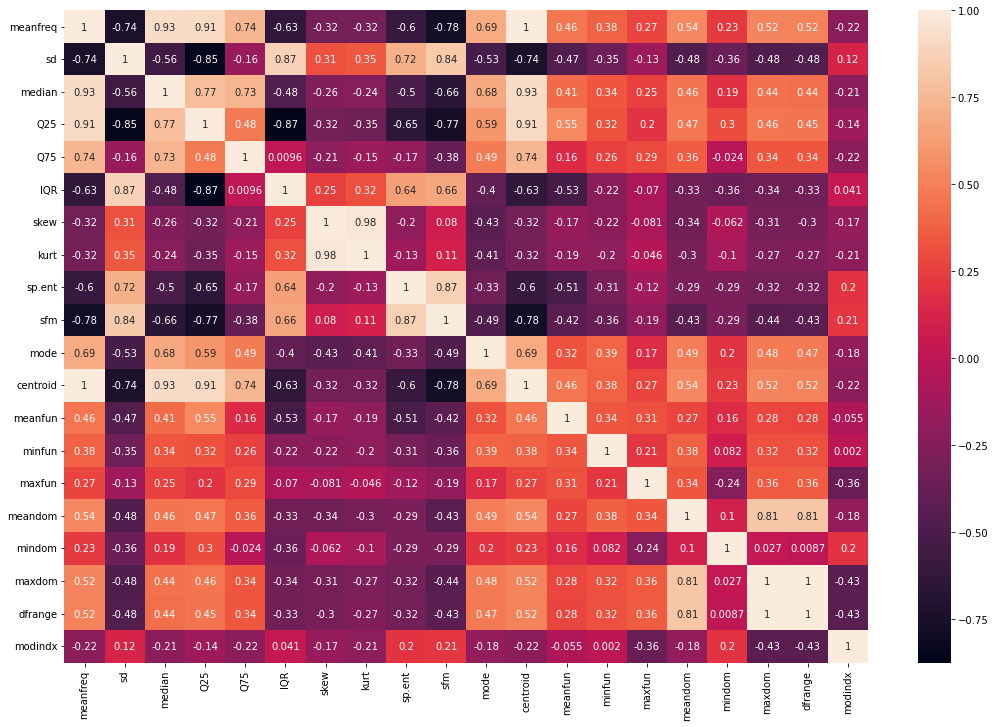

features to drop ['median', 'Q25', 'kurt', 'centroid', 'dfrange']


In [31]:
#code here
fig = plt.figure(figsize=(18,12))
# Create correlation matrix
corr_matrix = voice_df.corr()
sns.heatmap(corr_matrix, annot=True)
plt.show()


# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1)==1)
# Find features with correlation greater than 0.90
features_to_drop = [column for column in upper.columns if any(upper[column] >= 0.90)]
print("features to drop", features_to_drop)
# Drop features 
voice_df.drop(features_to_drop, axis=1, inplace=True)

**Separating Features & Y variable from the processed dataset**

**Please note to replace the dataframe below with the new dataframe created after removing highly correlated features**

In [32]:
# Split data into features and labels
voice_X = voice_df.drop(columns=['label']) #replace "voice_df1" with your dataframe from 2.3 to make sure the code runs
voice_y = voice_df['label']
print(voice_X.columns)

Index(['meanfreq', 'sd', 'Q75', 'IQR', 'skew', 'sp.ent', 'sfm', 'mode',
       'meanfun', 'minfun', 'maxfun', 'meandom', 'mindom', 'maxdom',
       'modindx'],
      dtype='object')


**2.4 Apply the following pre-processing steps:**

1) Use OrdinalEncoding to encode the label in the dataset (male & female)

2) Convert the label from a Pandas series to a Numpy (m x 1) vector. If you don't do this, it may cause problems when implementing the logistic regression model.

3)Split the dataset into training (60%), validation (20%), and test (20%) sets.

4) Standardize the columns in the feature matrices. To avoid information leakage, learn the standardization parameters from training, and then apply training, validation and test dataset.

5) Add a column of ones to the feature matrices of train, validation and test dataset. This is a common trick so that we can learn a coefficient for the bias term of a linear model.

In [33]:
#code here

## Ordinal Encoding in label + Convert the label from a Pandas series to a Numpy (m x 1) vector
enc = OrdinalEncoder(categories = [["male", "female"]])
voice_y_enc = enc.fit_transform(voice_y.to_numpy().reshape(-1, 1))

## Split the dataset into training (60%), validation (20%), and test (20%) sets.
x_train_val, x_test, y_train_val, y_test = train_test_split(voice_X, voice_y_enc, test_size=0.2, random_state = 418)
x_train, x_val, y_train, y_val = train_test_split(x_train_val, y_train_val, test_size=0.25, random_state = 418)

## Standardize the columns in the feature matrice
ss = StandardScaler()
x_train_scaled = ss.fit_transform(x_train)
x_val_scaled = ss.transform(x_val)
x_test_scaled = ss.transform(x_test)

## Add bias column
x_train = np.append(x_train_scaled, np.ones([x_train_scaled.shape[0],1]), axis = 1)

x_val = np.append(x_val_scaled, np.ones([x_val_scaled.shape[0],1]), axis = 1)

x_test = np.append(x_test_scaled, np.ones([x_test_scaled.shape[0],1]), axis = 1)

**2.5 Implement Logistic Regression**

We will now implement logistic regression with L2 regularization. Given an (m x n) feature matrix $X$, an (m x 1) label vector $y$, and an (n x 1) weight vector $w$, the hypothesis function for logistic regression is:

$$
y = \sigma(X w)
$$

where $\sigma(x) = \frac{1}{1 + e^{-x}}$, i.e. the sigmoid function. This function scales the prediction to be a probability between 0 and 1, and can then be thresholded to get a discrete class prediction.

Just as with linear regression, our objective in logistic regression is to learn the weights $𝑤$ which best fit the data. For L2-regularized logistic regression, we find an optimal $w$ to minimize the following loss function:

$$
\min_{w} \ -y^T \ \text{log}(\sigma(Xw)) \ - \  (\mathbf{1} - y)^T \ \text{log}(\mathbf{1} - \sigma(Xw)) \ + \ \alpha \| w \|^2_2 \\
$$

Unlike linear regression, however, logistic regression has no closed-form solution for the optimal $w$. So, we will use gradient descent to find the optimal $w$. The (n x 1) gradient vector $g$ for the loss function above is:

$$
g = X^T \Big(\sigma(Xw) - y\Big) + 2 \alpha w
$$

Below is pseudocode for gradient descent to find the optimal $w$. You should first initialize $w$ (e.g. to a (n x 1) zero vector). Then, for some number of epochs $t$, you should update $w$ with $w - \eta g $, where $\eta$ is the learning rate and $g$ is the gradient. You can learn more about gradient descent [here](https://www.coursera.org/lecture/machine-learning/gradient-descent-8SpIM).

> $w = \mathbf{0}$
> 
> $\text{for } i = 1, 2, ..., t$
>
> $\quad \quad w = w - \eta g $


Implement a LogisticRegression class with five methods: train, predict, calculate_loss, calculate_gradient, and calculate_sigmoid. **You may NOT use sklearn for this implementation. It is highly recommended that you vectorize your code.**

In [34]:
import math
class LogisticRegression():
    '''
    Logistic regression model with L2 regularization.

    Attributes
    ----------
    alpha: regularization parameter
    t: number of epochs to run gradient descent
    eta: learning rate for gradient descent
    w: (n x 1) weight vector
    '''
    
    def __init__(self, alpha, t, eta):
        self.alpha = alpha
        self.t = t
        self.eta = eta
        self.w = None

    def train(self, X, y):
        '''Trains logistic regression model using gradient descent 
        (sets w to its optimal value).
        
        Parameters
        ----------
        X : (m x n) feature matrix
        y: (m x 1) label vector
        
        Returns
        -------
        losses: (t x 1) vector of losses at each epoch of gradient descent
        '''
        ### Your code here
        losses = np.zeros((self.t ,1))
        n = X.shape[1]
        self.w = np.zeros((n,1))
        for i in range(self.t):
            loss = self.calculate_loss(X, y)
            losses[i] = loss
            self.w = self.w - self.eta * self.calculate_gradient(X,y)
        return losses
            
        
    def predict(self, X):
        '''Predicts on X using trained model. Make sure to threshold 
        the predicted probability to return a 0 or 1 prediction.
        
        Parameters
        ----------
        X : (m x n) feature matrix
        
        Returns
        -------
        y_pred: (m x 1) 0/1 prediction vector
        '''
        ### Your code here
        y_pred = self.calculate_sigmoid(X.dot(self.w))
        y_pred[y_pred >= 0.5] = 1
        y_pred[y_pred < 0.5] = 0
        return y_pred
    
    def calculate_loss(self, X, y):
        '''Calculates the logistic regression loss using X, y, w, 
        and alpha. Useful as a helper function for train().
        
        Parameters
        ----------
        X : (m x n) feature matrix
        y: (m x 1) label vector
        
        Returns
        -------
        loss: (scalar) logistic regression loss
        '''
        ### Your code here
        epsilon = 1e-5    
        pred = self.predict(X)
        loss = (-y.T.dot(np.log(pred + epsilon)) - (1 - y).T.dot(np.log(1 - pred+ epsilon ))).mean() + \
            self.alpha* np.square(self.w).mean()
        return loss
        
    def calculate_gradient(self, X, y):
        '''Calculates the gradient of the logistic regression loss 
        using X, y, w, and alpha. Useful as a helper function 
        for train().
        
        Parameters
        ----------
        X : (m x n) feature matrix
        y: (m x 1) label vector
        
        Returns
        -------
        gradient: (n x 1) gradient vector for logistic regression loss
        '''
        gradient = X.T.dot(self.calculate_sigmoid(X.dot(self.w))-y.reshape(-1, 1)) + 2*self.alpha * self.w  
        return gradient

    
    def calculate_sigmoid(self, x):
        '''Calculates the sigmoid function on each element in vector x. 
        Useful as a helper function for predict(), calculate_loss(), 
        and calculate_gradient().
        
        Parameters
        ----------
        x: (m x 1) vector
        
        Returns
        -------
        sigmoid_x: (m x 1) vector of sigmoid on each element in x
        '''
        ### Your code here
        sigmoid_x = 1 / (1 + np.exp(-x))
        return sigmoid_x

**2.6 Plot Loss over Epoch and Search the space randomly to find best hyperparameters.**

A: Using your implementation above, train a logistic regression model **(alpha=0, t=100, eta=1e-3)** on the voice recognition training data. Plot the training loss over epochs. Make sure to label your axes. You should see the loss decreasing and start to converge. 

B: Using **alpha between (0,1), eta between(0, 0.001) and t between (0, 100)**, find the best hyperparameters for LogisticRegression. You can randomly search the space 20 times to find the best hyperparameters.

C. Compare accuracy on the test dataset for both the scenarios.

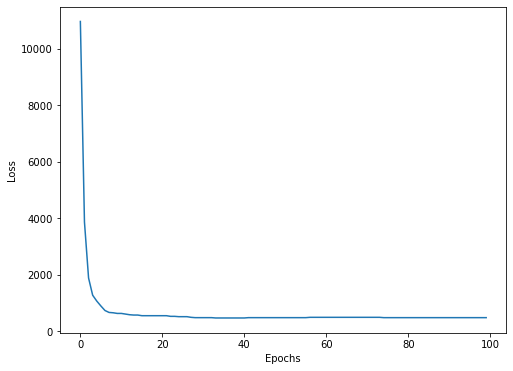

In [35]:
#code here (A)
lr1 = LogisticRegression(0, 100, 1e-3)
losses = lr1.train(x_train, y_train)
plt.plot(range(100),losses)
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()

In [36]:
#code here (B)
import random
log_alpha = 0
log_eta = 0
log_t =0
best_acc = 0

for i in range(20):
    alpha = (random.uniform(0, 1))
    eta = (random.uniform(0, 0.001))
    t = (random.randrange(0, 100))
    
    lr2 = LogisticRegression(alpha, t, eta)
    lr2.train(x_train, y_train)
    
    pred_val = lr2.predict(x_val)
    acc = (pred_val==y_val).mean()
    if(best_acc < acc):
        log_alpha = alpha
        log_eta = eta
        log_t = t
        best_acc= acc

print("Best Acc: ", best_acc, "Alpha: ", alpha, "Eta: ", eta, "t: ", t)

Best Acc:  0.9652996845425867 Alpha:  0.7074785148666857 Eta:  0.00023548111320721466 t:  98


In [37]:
#code here (C)
test_pred = lr1.predict(x_test)
print("Accuracy (A): ", (test_pred==y_test).mean())

lr2.alpha = log_alpha
lr2.eta = log_eta
lr2.t = log_t
test_pred = lr2.predict(x_test)
print("Accuracy (B): ", (test_pred==y_test).mean())

Accuracy (A):  0.9668769716088328
Accuracy (B):  0.9574132492113565


**2.7 Feature Importance**

Interpret your trained model using a bar chart of the model weights. Make sure to label the bars (x-axis) and don't forget the bias term! 

Answer: 'meanfun' is playing an important role in the model since its weight is significant among other features.

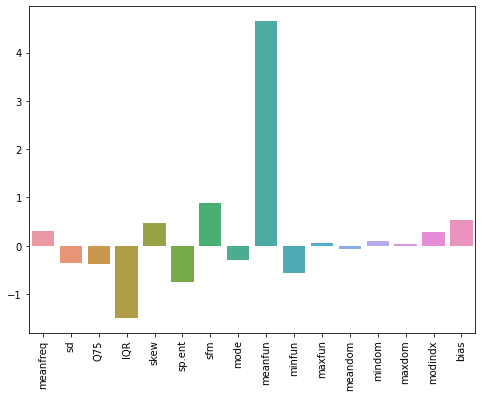

In [38]:
#code here
feature_names = list(voice_X.columns.values)
feature_names.append('bias')

ax = sns.barplot(x=feature_names, y= lr1.w.flatten())
ax.tick_params(axis='x', rotation=90)


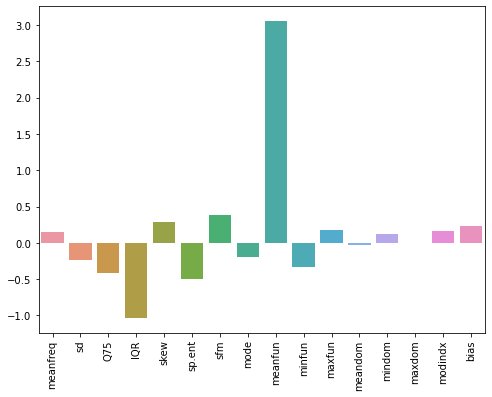

In [39]:
#code here
feature_names = list(voice_X.columns.values)
feature_names.append('bias')
ax = sns.barplot(x=feature_names, y= lr2.w.flatten())
ax.tick_params(axis='x', rotation=90)


# **Part 3: Support Vector Machines - with the same Dataset**

**3.1 Dual SVM**

A) Train a dual SVM (with default parameters) for both kernel=“linear” and kernel=“rbf”) on the Voice Recognition training data.

B) Make predictions and report the accuracy on the training, validation, and test sets. Which kernel gave better accuracy on test dataset and why do you think that was better?

C) Please report the support vectors in both the cases and what do you observe? Explain


In [40]:
#code here (A) & (B)
from sklearn import compose
from sklearn import pipeline
from sklearn import model_selection

## remove bias column
df_train = pd.DataFrame(x_train[:, :-1], columns = feature_names[:-1])
df_val = pd.DataFrame(x_val[:, :-1], columns = feature_names[:-1])
df_test = pd.DataFrame(x_test[:, :-1], columns = feature_names[:-1])


print("<Linear Kernel>")
clf1 = SVC(kernel='linear')
preprocess = compose.make_column_transformer((StandardScaler(), feature_names[:-1]))
pipe = pipeline.make_pipeline(preprocess, clf1)

pipe.fit(df_train, y_train.flatten())
y_pred_train= clf1.predict(df_train)
print("Train Acc: ", accuracy_score(y_train, y_pred_train))
y_pred_val= clf1.predict(df_val)
print("Val Acc: ", accuracy_score(y_val, y_pred_val))
y_pred_test= clf1.predict(df_test)
print("Test Acc: ", accuracy_score(y_test, y_pred_test))

print()
print("<RBF Kernel>")
clf2 = SVC(kernel='rbf')
preprocess = compose.make_column_transformer((StandardScaler(), feature_names[:-1]))
pipe = pipeline.make_pipeline(preprocess, clf2)

pipe.fit(df_train, y_train.flatten())
y_pred_train= clf2.predict(df_train)
print("Train Acc: ", accuracy_score(y_train, y_pred_train))
y_pred_val= clf2.predict(df_val)
print("Val Acc: ", accuracy_score(y_val, y_pred_val))
y_pred_test= clf2.predict(df_test)
print("Test Acc: ", accuracy_score(y_test, y_pred_test))

<Linear Kernel>
Train Acc:  0.9794736842105263
Val Acc:  0.9668769716088328
Test Acc:  0.9637223974763407

<RBF Kernel>
Train Acc:  0.9873684210526316
Val Acc:  0.9747634069400631
Test Acc:  0.9716088328075709


Answer: The RBF Kernel showed slightly higher test accuracy. This is because it is a non-linear kernel which can capture non-linear patterns in the dataset that linear kernels couldn't leverage. It is much more powerful than linear kernels.

In [41]:
#code here (C)
print("Linear Kernel", clf1.n_support_)
print("RBF Kernel", clf2.n_support_)

Linear Kernel [66 66]
RBF Kernel [129 131]


Answer: We can also observe the fact that RBF kernel has double the number of support vectors than Linear Kernels.This is because as RBF Kernel has non-linear decision boundary which is more complex, it requires more support vectors.

**3.2 Using Kernel “rbf”, tune the hyperparameter “C” using the Grid Search & k-fold cross validation. You may take k=5 and assume values in grid between 1 to 100 with interval range of your choice.**

In [42]:
#code here
print("<RBF Kernel>")
preprocess = compose.make_column_transformer((StandardScaler(), feature_names[:-1]))
pipe = pipeline.make_pipeline(preprocess,model_selection.GridSearchCV(SVC(), param_grid= {"kernel": ['rbf'], \
                                                                          "C": range(1, 100)}, cv=5, return_train_score = True))
## merge train & val data to dev data for k-fold cross validation
df_dev = df_train.append(df_val)
y_dev = np.vstack((y_train, y_val))

pipe.fit(df_dev, y_dev.flatten())

grid_search_results = pipe.named_steps['gridsearchcv']
print("Best Acc: ", grid_search_results.best_score_)
print("Best Params: ", grid_search_results.best_params_)
print("Test Score: ", pipe.score(df_test, y_test))

<RBF Kernel>
Best Acc:  0.983423377068862
Best Params:  {'C': 2, 'kernel': 'rbf'}
Test Score:  0.973186119873817
